In [1]:
import pandas as pd
from math import ceil, floor
import matplotlib.pyplot as plt
import seaborn as sns
import json
import matplotlib
from matplotlib import ticker
%matplotlib inline

In [2]:
data = pd.read_csv("../components/artifacts/postprocess_data.csv", sep = "\t", index_col = 0)
data["Date"] = pd.to_datetime(data["Date"])
data["Gender"] = data["Gender"].astype("category")
data["Account Type"] = data["Account Type"].astype("category")
data["Tweet Type"] = pd.Categorical(values = data["Tweet Type"], categories = ["share", "reply", "post"], ordered = True)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/numpy/lib/arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
data.head()

,Date,Page Type,Author,Full Name,Full Text,Hashtags,Impact,Impressions,Tweet Type,Thread Author,...,screen,Gender,Account Type,Ethnicity,followers_count,screen_originator,Gender_originator,Account Type_originator,Ethnicity_originator,followers_count_originator
0,2017-12-06 23:59:59,twitter,William82861606,William82861606 (William),funder conyers resigned franken resigning tomo...,"#trumpsexprobe, #metoo",0.0,282.0,share,funder,...,William82861606,male,core,Asian,2548.0,funder,male,influencer,White,336269.0
1,2017-12-06 23:59:58,twitter,Artis_Elemental,Artis_Elemental (ART...Is),alyssa_milano list sexual misconduct allegatio...,#metoo,24.5,5578.0,share,Alyssa_Milano,...,Artis_Elemental,male,core,Black,7217.0,Alyssa_Milano,NaN,celebrity,NaN,3698114.0
2,2017-12-06 23:59:57,twitter,lanah03,lanah03 (Laura Hopkins),deepinthehills sobbing silent longer,#metoo,5.4,2713.0,share,DeepInTheHills,...,lanah03,female,core,Black,2775.0,NaN,NaN,NaN,NaN,NaN
3,2017-12-06 23:59:55,twitter,lidskawasaki,lidskawasaki (dearlordbabyjesus),alyssa_milano time asking franken resign senat...,"#timepersonoftheyear, #metoo",0.0,330.0,share,Alyssa_Milano,...,lidskawasaki,female,core,Black,655.0,Alyssa_Milano,NaN,celebrity,NaN,3698114.0
4,2017-12-06 23:59:54,twitter,IAmMeliLopez,IAmMeliLopez (Melissa Lopez),nycchr public hearing begun stories deserve he...,"#sexualharassment, #metoo",0.0,13.0,share,NYCCHR,...,IAmMeliLopez,female,core,Asian,18.0,NYCCHR,male,core,Black,12572.0


In [5]:
data.columns

Index(['Date', 'Page Type', 'Author', 'Full Name', 'Full Text', 'Hashtags',
       'Impact', 'Impressions', 'Tweet Type', 'Thread Author',
       'Twitter Followers', 'Twitter Following', 'Twitter Tweets',
       'Twitter Reply Count', 'Twitter Verified', 'Twitter Retweets',
       'Reach (new)', 'Region', 'topic_1', 'topic_2', 'topic_3', 'topic_4',
       'topic_5', 'topic_6', 'topic_7', 'topic_8', 'topic_9', 'topic_10',
       'screen', 'Gender', 'Account Type', 'Ethnicity', 'followers_count',
       'screen_originator', 'Gender_originator', 'Account Type_originator',
       'Ethnicity_originator', 'followers_count_originator'],
      dtype='object')

In [7]:
analysis_data = data[['Author','Gender', 'Account Type', 'Ethnicity', 'followers_count']]
analysis_data.head()

,Author,Gender,Account Type,Ethnicity,followers_count
0,William82861606,male,core,Asian,2548.0
1,Artis_Elemental,male,core,Black,7217.0
2,lanah03,female,core,Black,2775.0
3,lidskawasaki,female,core,Black,655.0
4,IAmMeliLopez,female,core,Asian,18.0


In [8]:
analysis_data['Account Type'].unique()

['core', 'influencer', 'organisational', 'news', 'celebrity', 'business']
Categories (6, object): ['core', 'influencer', 'organisational', 'news', 'celebrity', 'business']

In [14]:
influencers = analysis_data[analysis_data['Account Type'] == 'influencer']
print(influencers.head(5))
influencers['followers_count'].describe().apply(lambda x: format(x, 'f'))

            Author  Gender Account Type Ethnicity  followers_count
19      MrDane1982    male   influencer     Black          75466.0
20  MaryKeithBare1  female   influencer     Black          20276.0
57  haymarketbooks    male   influencer     Black          72696.0
91  stacy_redvirgo    male   influencer     Black          31145.0
92     Politics_PR    male   influencer     White         226211.0


count      400275.000000
mean        70209.401786
std        193713.729972
min         20002.000000
25%         26444.000000
50%         37720.000000
75%         62570.000000
max      79756787.000000
Name: followers_count, dtype: object

In [62]:
import matplotlib.ticker as tick

def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format

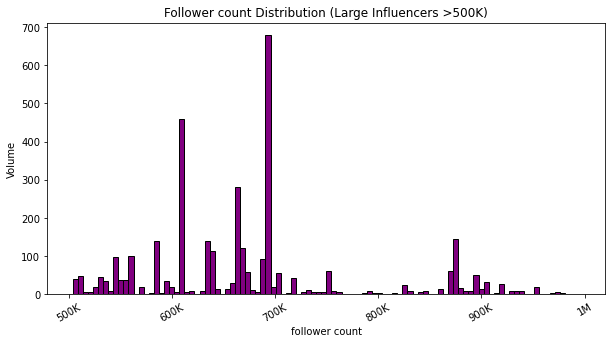

In [79]:
plt.figure(figsize=(10,5))
potential_influencer = influencers[(influencers['followers_count']>500000) & (influencers['followers_count']<1000000)] # more than 5M
plt.hist(potential_influencer['followers_count'], bins=100, align='right', color='purple', edgecolor='black')
plt.xticks(rotation='30')
plt.xlabel('follower count')
plt.ylabel('Volume')
plt.title('Follower count Distribution (Large Influencers >500K)')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# plt.ticklabel_format(style='plain')


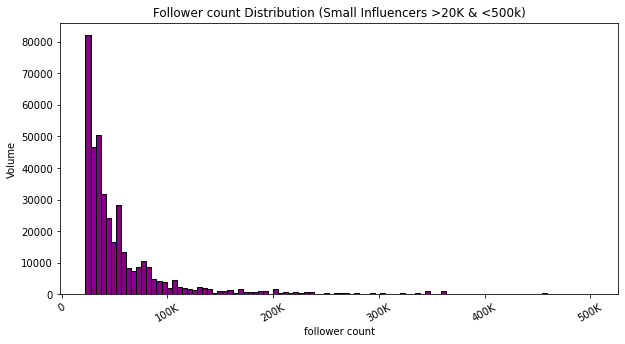

In [80]:
plt.figure(figsize=(10,5))
potential_influencer = influencers[(influencers['followers_count']>20000) & (influencers['followers_count']<500000)] # more than 5M
plt.hist(potential_influencer['followers_count'], bins=100, align='right', color='purple', edgecolor='black')
plt.xticks(rotation='30')
plt.xlabel('follower count')
plt.ylabel('Volume')
plt.title('Follower count Distribution (Small Influencers >20K & <500k)')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# plt.ticklabel_format(style='plain')


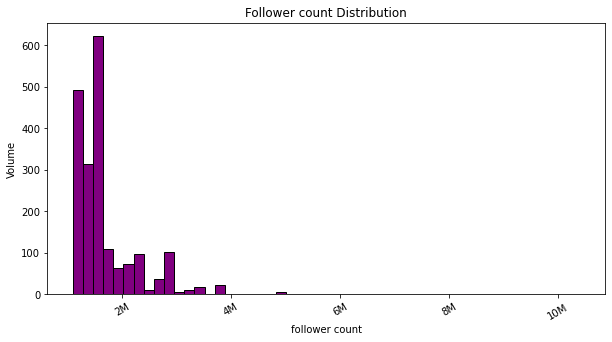

In [73]:
plt.figure(figsize=(10,5))
potential_celebs = influencers[(influencers['followers_count']>1000000) & (influencers['followers_count']<20000000)] # more than 5M
plt.hist(potential_celebs['followers_count'], bins=50, align='right', color='purple', edgecolor='black')
plt.xticks(rotation='30')
plt.xlabel('follower count')
plt.ylabel('Volume')
plt.title('Follower count Distribution')
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
# plt.ticklabel_format(style='plain')


In [33]:
# Generate data on commute times.
import numpy as np
size, scale = 1000, 10
commutes = pd.Series(np.random.gamma(scale, size=size) ** 1.5)
pd.Series(influencers['followers_count'])
#.plot.hist(grid=True, bins=20, rwidth=0.9)
commutes.describe()
# commutes.plot.hist(grid=True, bins=20, rwidth=0.9)

count    1000.000000
mean       32.632232
std        15.315394
min         5.506353
25%        21.194317
50%        30.705163
75%        40.443542
max       107.554115
dtype: float64